In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Reading the Dataset 

In [20]:
dataset=pd.read_csv('C:/Users/Socrates/Downloads/assignment/train.csv')

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
user_name             63264 non-null object
country               82622 non-null object
review_title          82657 non-null object
review_description    82657 non-null object
designation           59010 non-null object
points                82657 non-null int64
price                 77088 non-null float64
province              82622 non-null object
region_1              69903 non-null object
region_2              35949 non-null object
winery                82657 non-null object
variety               82657 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


In [22]:
dataset.columns

Index(['user_name', 'country', 'review_title', 'review_description',
       'designation', 'points', 'price', 'province', 'region_1', 'region_2',
       'winery', 'variety'],
      dtype='object')

In [23]:
def colorPalette(size):                      ### Function to get a color palette
    colors=[]
    for ele in range(0,size):
        colors.append(np.random.rand(3,))
    return colors

# Insights from the Data

### 1. Top X variety ranking based on total accumilative points
### 2. Top X wine producing countries , based on quantity sold
### 3. Market share of top X varities , based on total quantity of products sold
### 4. Top X countries countries based on total cost of products sold
### 5. Top X varities of wines sold 

### Here X is a variable integer value based on User requirements

### -------------------------------------------------------------------------------------------------------------------------------------------------------------

# 1. Top X Variety ranking based on total accumilative points

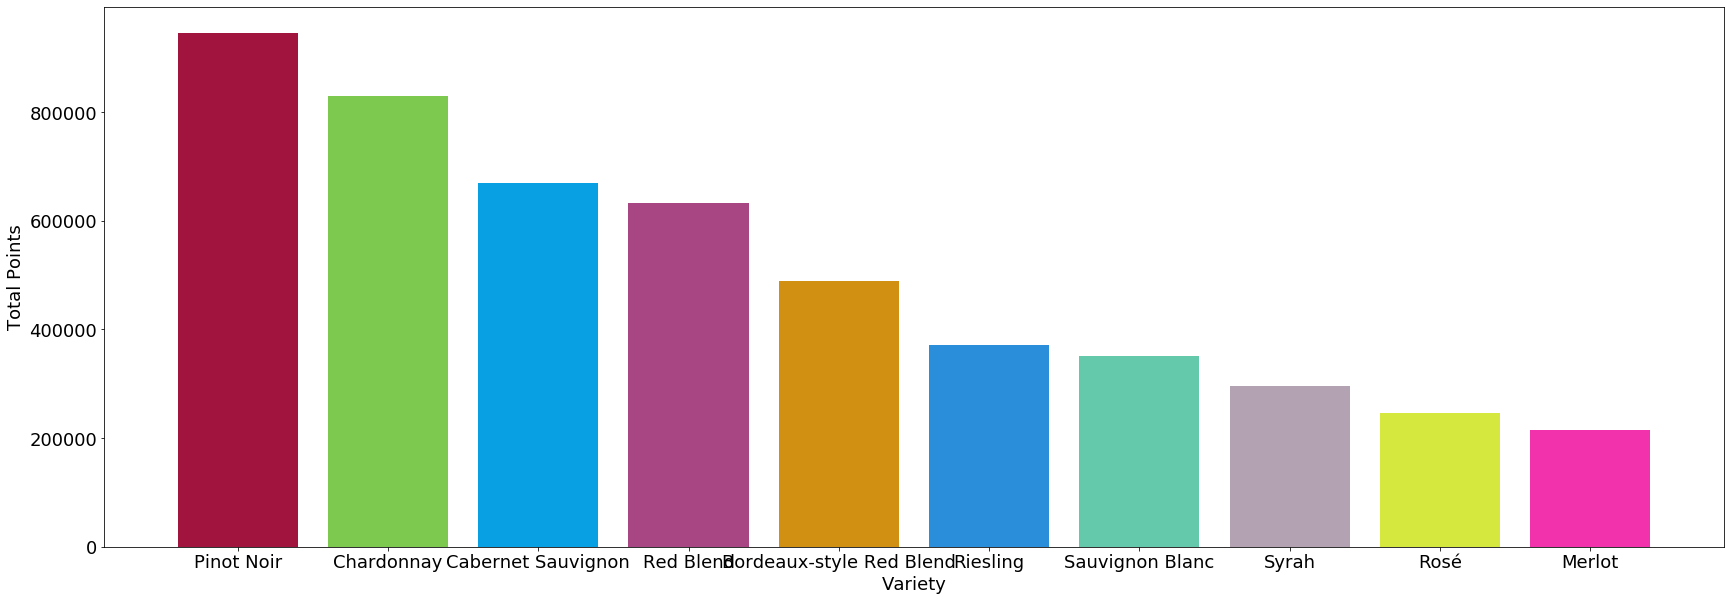

In [25]:
matplotlib.rcParams.update({'font.size': 18})               ### Setting the font size
topX=10                                                   ### Variable X is set to 10
colors=colorPalette(topX)                                     ### Getting the color palate
fig1 = plt.figure(figsize=(30,10))
ax1=fig1.add_axes([0.1,0.1,0.75,0.75])
variety=dataset.groupby('variety').sum().sort_values(by=['points'],ascending=False).index[0:topX]
points=dataset.groupby('variety').sum().sort_values(by=['points'],ascending=False)['points'][0:topX]
ax1.bar(variety,points,color=colors)
plt.xlabel('Variety')
plt.ylabel('Total Points')
plt.savefig("Insight1.png", format="png")
plt.show()

## ---------------------------------------------------------------------------------------------------------------------------------

## 2 . Top X wine producing countries , based on quantity sold

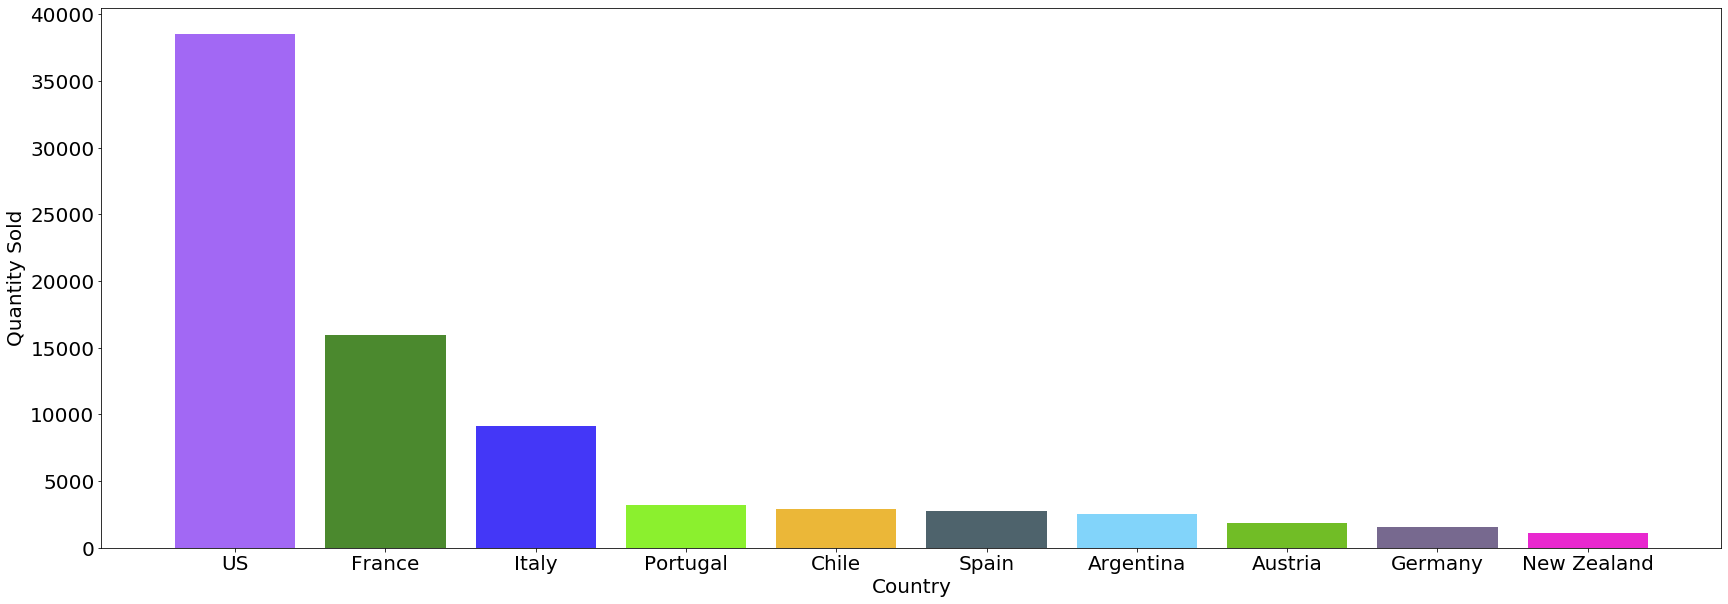

In [26]:
matplotlib.rcParams.update({'font.size': 20})             ### Setting the font size
topX=10                                                   ### Variable X is set to 8
colors=colorPalette(topX)                                  ### Getting the color palate
fig2 = plt.figure(figsize=(30,10))
ax2=fig2.add_axes([0.1,0.1,0.75,0.75])
country=dataset['country'].value_counts().index[:topX]
quantity_sold=dataset['country'].value_counts()[:topX]
ax2.bar(country,quantity_sold,color=colors)
plt.xlabel('Country')
plt.ylabel('Quantity Sold')       ### Quantity as total bottels sold
plt.savefig("Insight2.png", format="png")
plt.show()

## ---------------------------------------------------------------------------------------------------------------------------------

### 3. Market share of top X varities , based on total quantity of products sold


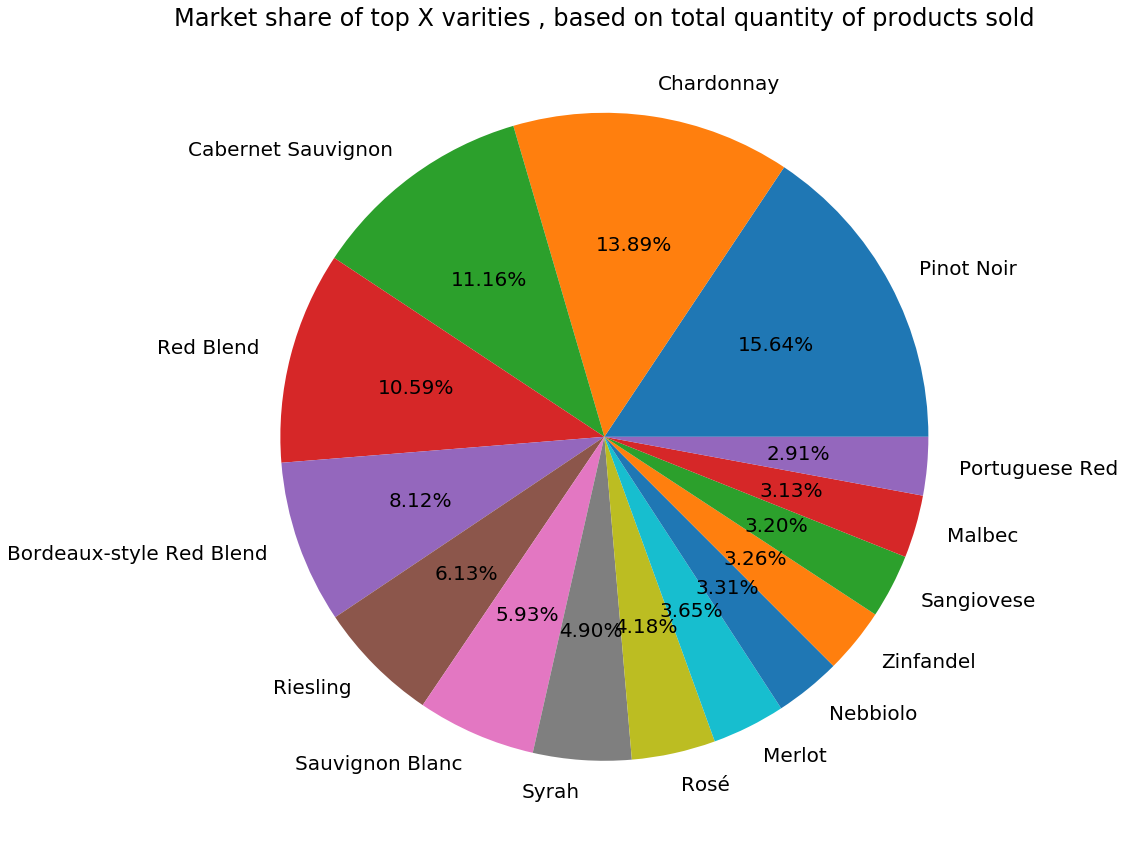

In [29]:
data=dataset['variety'].value_counts()
topX=15                                 #### max = 28
fig3=plt.figure(figsize=(15,15))
ax3=fig3.add_axes([0.1,0.1,0.75,0.75])
ax3.axis('equal')
ax3.pie(data[:topX],labels=data.index[:topX],autopct='%1.2f%%')
plt.title('Market share of top X varities , based on total quantity of products sold')
plt.savefig("Insight3.png", format="png")
plt.show()

## ---------------------------------------------------------------------------------------------------------------------------------

## 4. Top X countries countries based on total cost of products sold

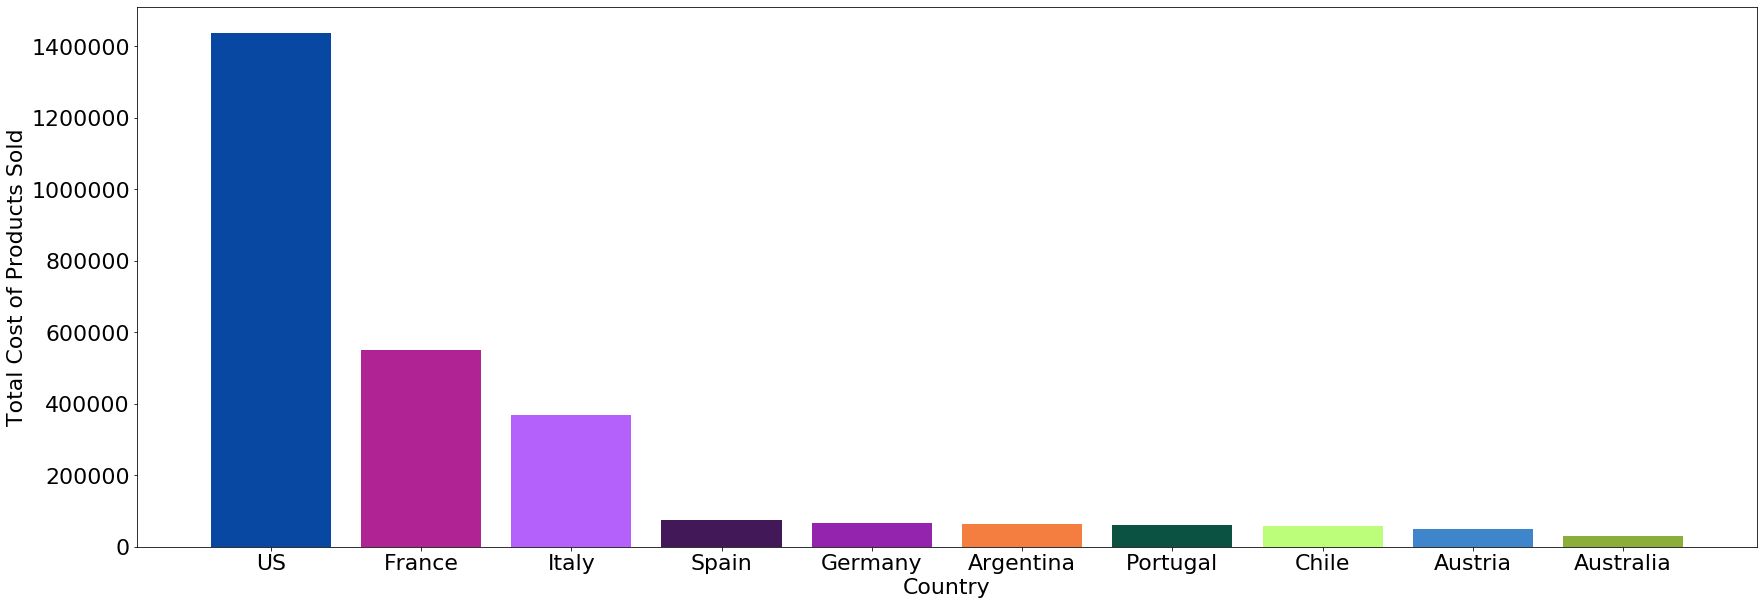

In [31]:
matplotlib.rcParams.update({'font.size': 22})               ### Setting the font size
topX=10                                                   ### Variable X is set to 8
colors=colorPalette(topX)                                     ### Getting the color palate
fig4 = plt.figure(figsize=(30,10))
ax4=fig4.add_axes([0.1,0.1,0.75,0.75])
variety=dataset.groupby('country').sum().sort_values(by=['price'],ascending=False).index[0:topX]
points=dataset.groupby('country').sum().sort_values(by=['price'],ascending=False)['price'][0:topX]
ax4.bar(variety,points,color=colors)
plt.xlabel('Country')
plt.ylabel('Total Cost of Products Sold')
plt.savefig("Insight4.png", format="png")
plt.show()

## ---------------------------------------------------------------------------------------------------------------------------------

## 5. Market share of top X varities of wines sold, based on cost of products sold

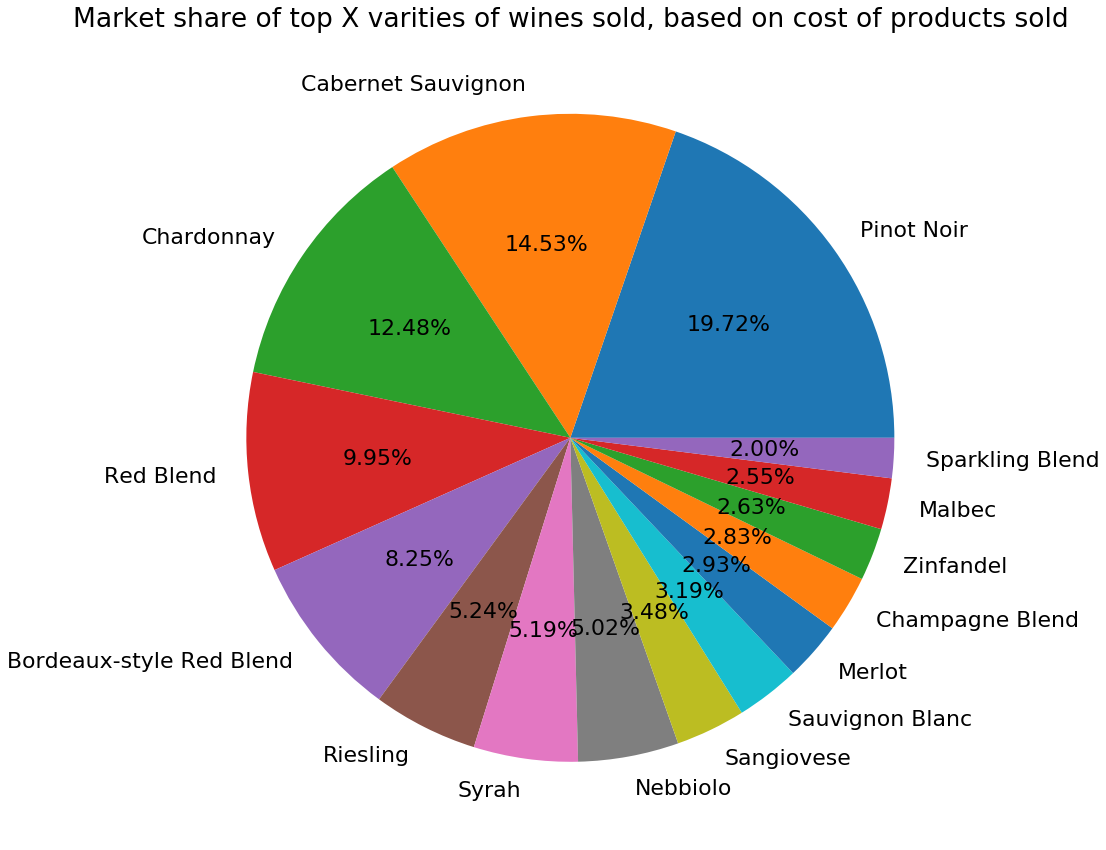

In [34]:
topX=15
data=dataset.groupby('variety').sum().sort_values(by=['price'],ascending=False)
fig5=plt.figure(figsize=(15,15))
ax5=fig5.add_axes([0.1,0.1,0.75,0.75])
ax5.axis('equal')
ax5.pie(data['price'][:topX],labels=data.index[:topX],autopct='%1.2f%%')
plt.title('Market share of top X varities of wines sold, based on cost of products sold')
plt.savefig("Insight5.png", format="png")
plt.show()